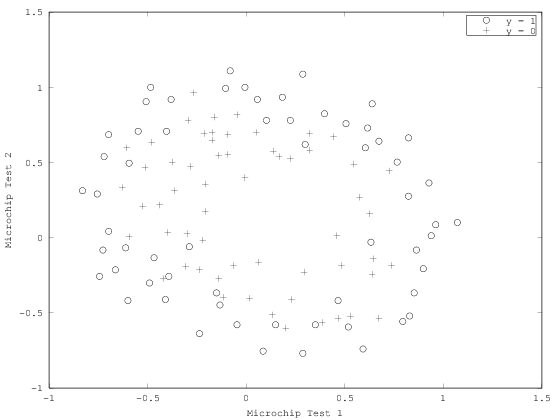

In [133]:
%% Machine Learning Online Class - Exercise 2: Logistic Regression
%
%  Instructions
%  ------------
% 
%  This file contains code that helps you get started on the second part
%  of the exercise which covers regularization with logistic regression.
%
%  You will need to complete the following functions in this exericse:
%
%     sigmoid.m
%     costFunction.m
%     predict.m
%     costFunctionReg.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

%% Initialization
clear ; close all; clc

%% Load Data
%  The first two columns contains the X values and the third column
%  contains the label (y).

data = load('ex2data2.txt');
X = data(:, [1, 2]); y = data(:, 3);

plotData(X, y);

% Put some labels 
hold on;

% Labels and Legend
xlabel('Microchip Test 1')
ylabel('Microchip Test 2')

% Specified in plot order
legend('y = 1', 'y = 0')
hold off;

In [134]:
%% =========== Part 1: Regularized Logistic Regression ============
%  In this part, you are given a dataset with data points that are not
%  linearly separable. However, you would still like to use logistic 
%  regression to classify the data points. 
%
%  To do so, you introduce more features to use -- in particular, you add
%  polynomial features to our data matrix (similar to polynomial
%  regression).
%

% Add Polynomial Features

% Note that mapFeature also adds a column of ones for us, so the intercept
% term is handled
X = mapFeature(X(:,1), X(:,2));

% Initialize fitting parameters
initial_theta = zeros(size(X, 2), 1);

% Set regularization parameter lambda to 1
lambda = 1;

% Compute and display initial cost and gradient for regularized logistic
% regression
[cost, grad] = costFunctionReg(initial_theta, X, y, lambda);

fprintf('Cost at initial theta (zeros): %f\n', cost);

Cost at initial theta (zeros): 0.693147


Train Accuracy: 83.050847


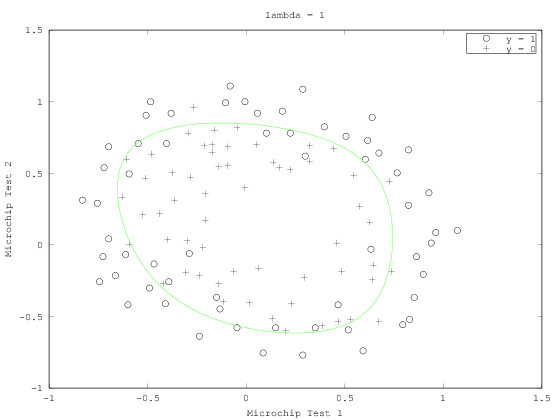

In [135]:
% Initialize fitting parameters
initial_theta = zeros(size(X, 2), 1);

% Set regularization parameter lambda to 1 (you should vary this)
lambda = 1;

% Set Options
options = optimset('GradObj', 'on', 'MaxIter', 400);

% Optimize
[theta, J, exit_flag] = ...
	fminunc(@(t)(costFunctionReg(t, X, y, lambda)), initial_theta, options);
% Plot Boundary
plotDecisionBoundary(theta, X, y);
hold on;
title(sprintf('lambda = %g', lambda))

% Labels and Legend
xlabel('Microchip Test 1')
ylabel('Microchip Test 2')

legend('y = 1', 'y = 0', 'Decision boundary')
hold off;
p = predict(theta, X);
fprintf('Train Accuracy: %f\n', mean(double(p == y)) * 100);

In [128]:
theta = initial_theta;
thetaTemp = initial_theta;
thetaTemp(1) = 0;
m = length(y); 
sum(-y .* log(sigmoid(X*theta))+(1-y).*log(1-sigmoid(X*theta))) + sum(thetaTemp.^ 2)*(lambda/(2 * m))

ans = -1.3863


In [103]:
size((sigmoid(X*initial_theta)-y(1)))

ans =

   118     1

